# Part 1: Data Prep

## Imports and Installations

In [62]:
# !pip install yfinance --upgrade --no-cache-dir

In [63]:
# Imports
import pandas as pd
import yfinance as yf
import numpy as np
import random as rnd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [64]:
# Define the list of top Canadian companies
canadian_stock_list = [
    'RY.TO', 'TD.TO', 'BNS.TO', 'ENB.TO', 'CNQ.TO', 'SHOP.TO', 'BMO.TO', 'BCE.TO', 'TRP.TO', 'CNR.TO', 'SU.TO',
    'FTS.TO', 'MRU.TO', 'MG.TO', 'MFC.TO', 'POW.TO', 'SLF.TO', 'NA.TO'
]

# Define the time period for data retrieval
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2024, 4, 30)

In [65]:
# Dictionary to store stock data
canadian_stock_data = {}

# Loop through the Canadian stock list and download data for each stock
for stock in canadian_stock_list:
    try:
        canadian_stock_data[stock] = yf.download(stock, start=start_date, end=end_date)
        print(f"Downloaded data for {stock}")
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for RY.TO
Downloaded data for TD.TO
Downloaded data for BNS.TO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for ENB.TO
Downloaded data for CNQ.TO
Downloaded data for SHOP.TO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for BMO.TO
Downloaded data for BCE.TO
Downloaded data for TRP.TO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for CNR.TO
Downloaded data for SU.TO
Downloaded data for FTS.TO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Downloaded data for MRU.TO
Downloaded data for MG.TO
Downloaded data for MFC.TO


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Downloaded data for POW.TO
Downloaded data for SLF.TO
Downloaded data for NA.TO


In [66]:
# Example: Access the data for RBC
print(canadian_stock_data['RY.TO'].head())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2010-01-04  56.360001  56.619999  55.639999  56.619999  32.025002  2768000
2010-01-05  56.619999  56.980000  55.700001  55.750000  31.532930  2699300
2010-01-06  55.549999  55.689999  55.110001  55.340000  31.301023  3513800
2010-01-07  55.250000  55.520000  54.919998  55.389999  31.329304  2229500
2010-01-08  55.150002  55.570000  55.060001  55.290001  31.272741  1953500


## Exploratory Data Analysis

### Basic Data Overview

In [67]:
# Check the structure of the data
for stock in canadian_stock_data:
    print(f"Data for {stock}:")
    print(canadian_stock_data[stock].info())
    print(canadian_stock_data[stock].head())

Data for RY.TO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3594 entries, 2010-01-04 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3594 non-null   float64
 1   High       3594 non-null   float64
 2   Low        3594 non-null   float64
 3   Close      3594 non-null   float64
 4   Adj Close  3594 non-null   float64
 5   Volume     3594 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.5 KB
None
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2010-01-04  56.360001  56.619999  55.639999  56.619999  32.025002  2768000
2010-01-05  56.619999  56.980000  55.700001  55.750000  31.532930  2699300
2010-01-06  55.549999  55.689999  55.110001  55.340000  31.301023  3513800
2010-01-07  55.250000  55.520000  54.919998  55.389999  31.329304  2229500
2010-01-08  55.150002  55.570000 

### Data Cleaning

In [68]:
# Check for missing values
for stock in canadian_stock_data:
    print(f"Missing values for {stock}:")
    print(canadian_stock_data[stock].isnull().sum())

# Handle missing values using forward filling
for stock in canadian_stock_data:
    canadian_stock_data[stock].fillna(method='ffill', inplace=True)


Missing values for RY.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for TD.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for BNS.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for ENB.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for CNQ.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for SHOP.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for BMO.TO:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values for BCE.TO:
Open         0
High         0
Low          0
Close        0
Adj 

### Simple Descriptive Statistics

In [69]:
# Summary statistics
for stock in canadian_stock_data:
    print(f"Summary statistics for {stock}:")
    print(canadian_stock_data[stock].describe())

Summary statistics for RY.TO:
              Open         High          Low        Close    Adj Close  \
count  3594.000000  3594.000000  3594.000000  3594.000000  3594.000000   
mean     89.282905    89.833581    88.731848    89.306970    71.002881   
std      27.040589    27.176218    26.924026    27.046663    31.932556   
min      43.849998    44.040001    43.299999    43.400002    26.454699   
25%      64.230003    64.734999    63.779999    64.352499    41.951383   
50%      89.785000    90.950001    89.185001    90.165001    70.376247   
75%     106.297503   106.839998   105.799997   106.385000    89.568430   
max     148.899994   149.600006   147.750000   149.149994   138.534180   

             Volume  
count  3.594000e+03  
mean   3.094187e+06  
std    2.018617e+06  
min    2.150000e+05  
25%    1.871350e+06  
50%    2.522950e+06  
75%    3.576650e+06  
max    2.028350e+07  
Summary statistics for TD.TO:
              Open         High          Low        Close    Adj Close  \
c

### Visualization

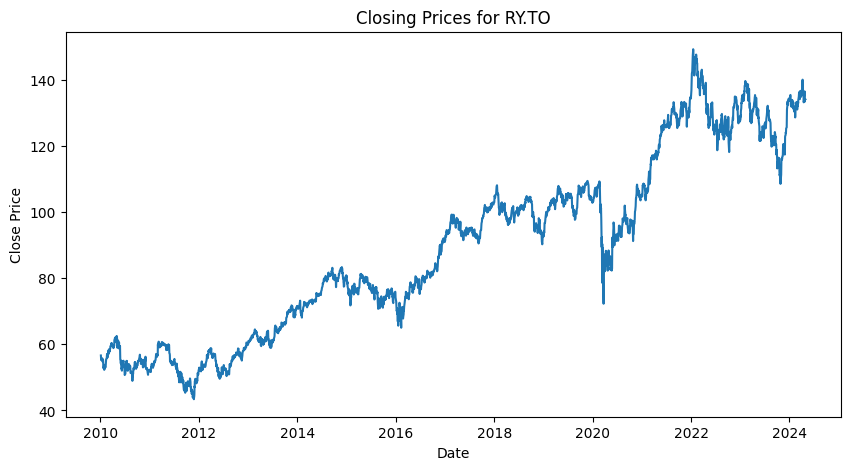

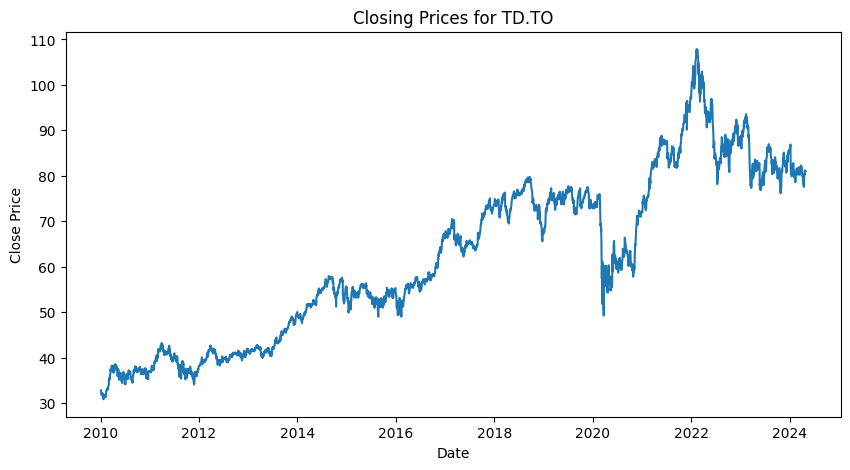

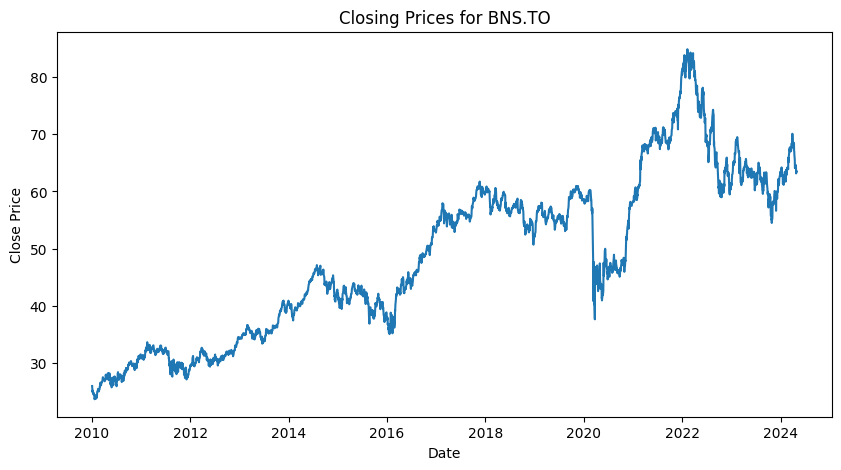

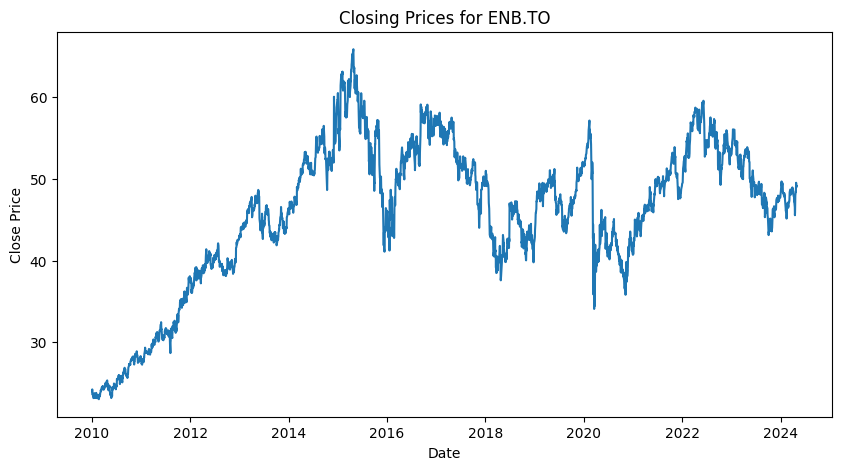

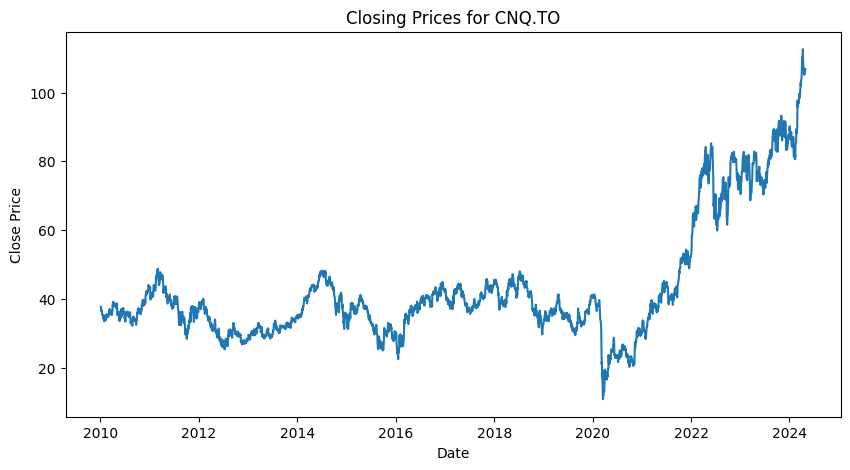

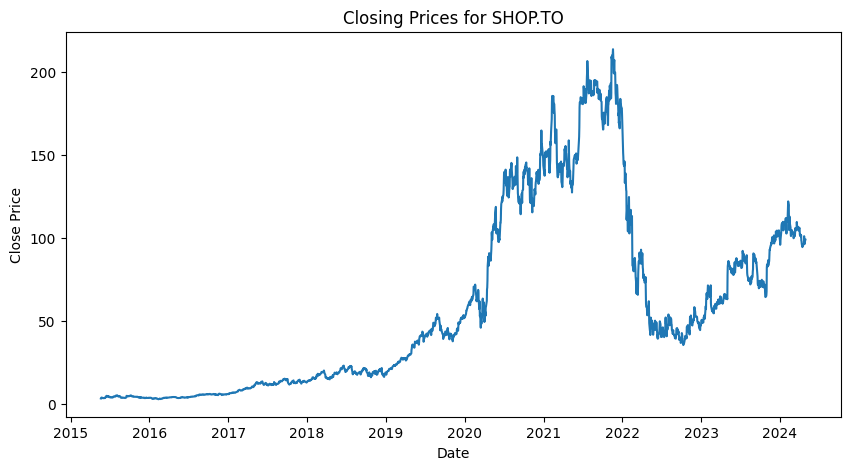

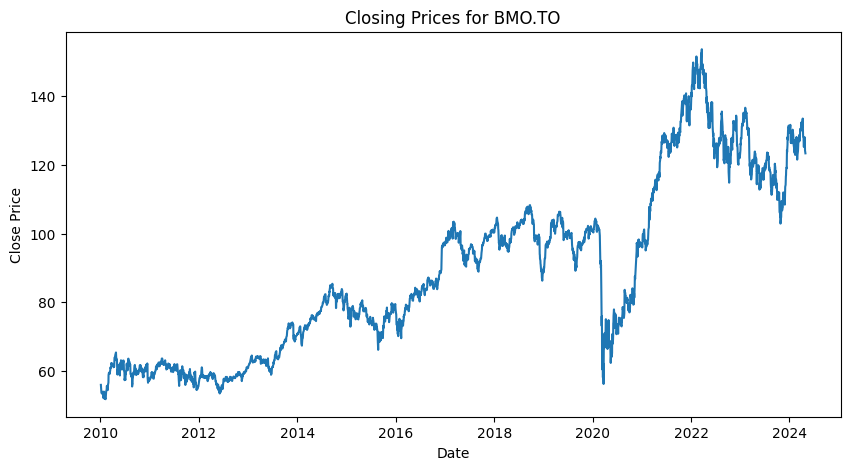

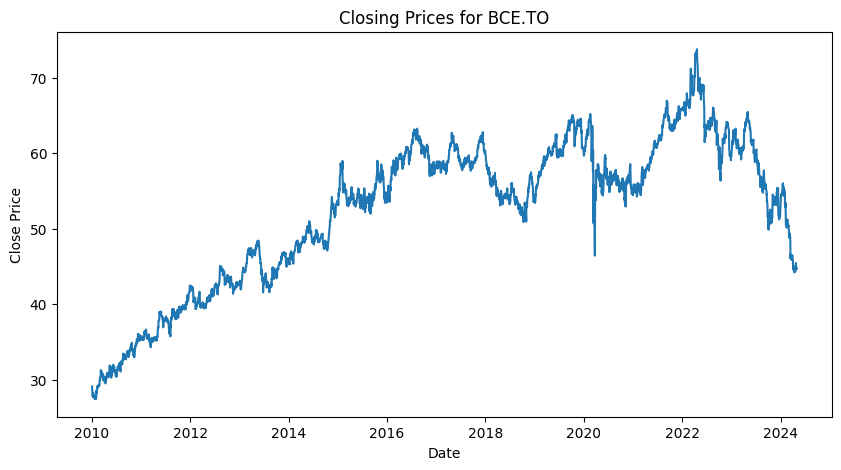

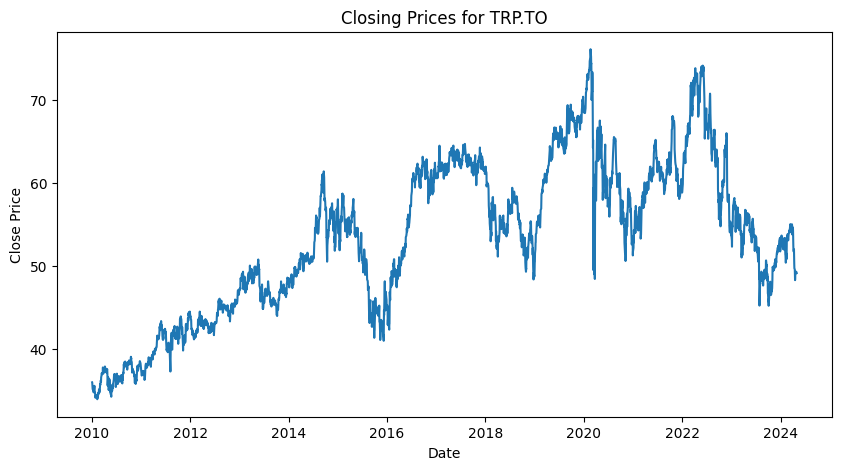

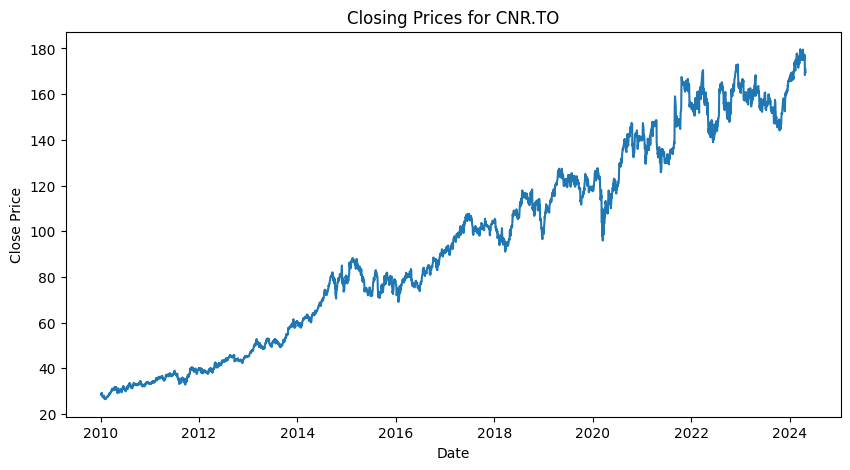

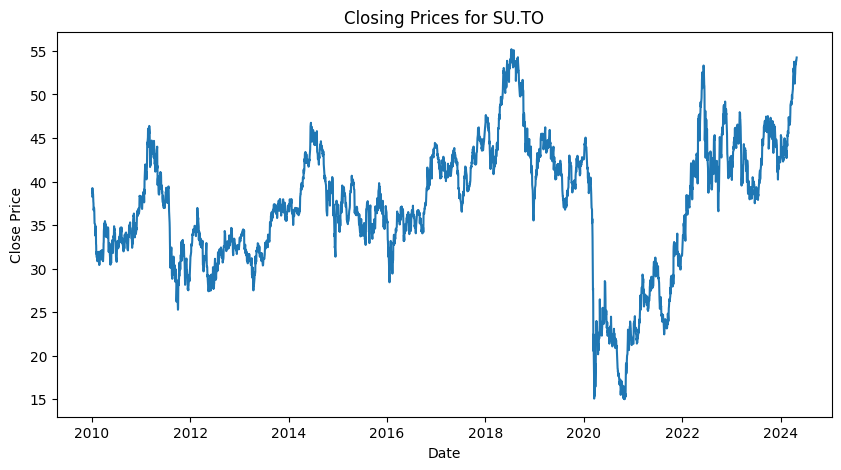

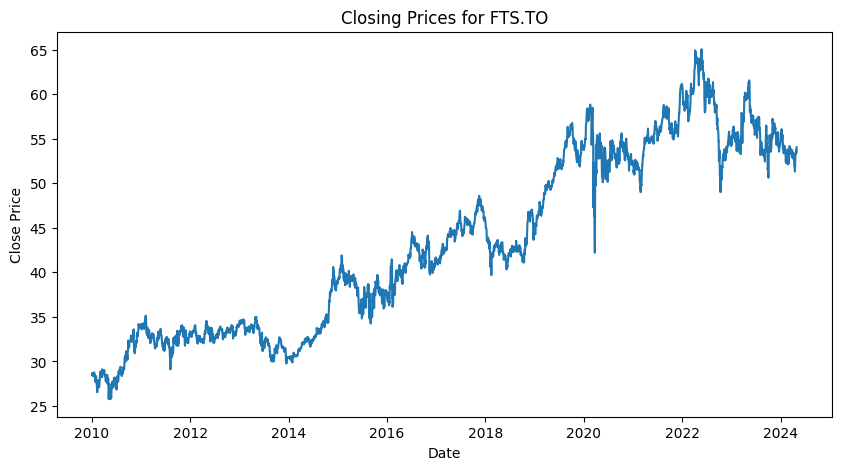

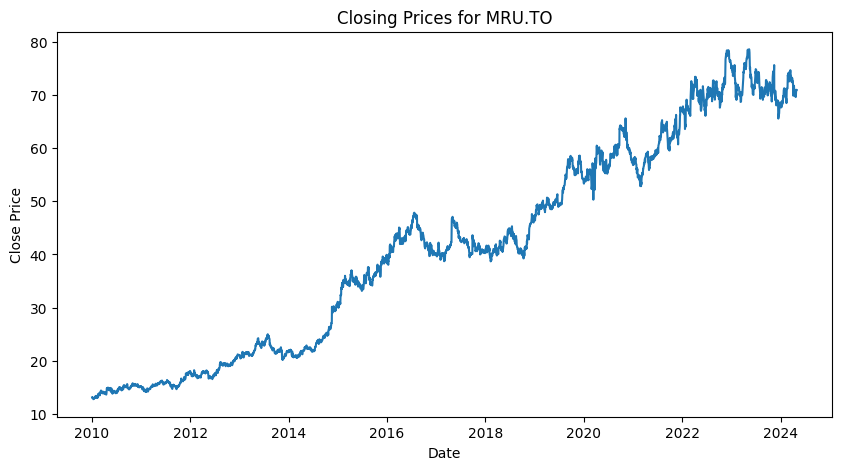

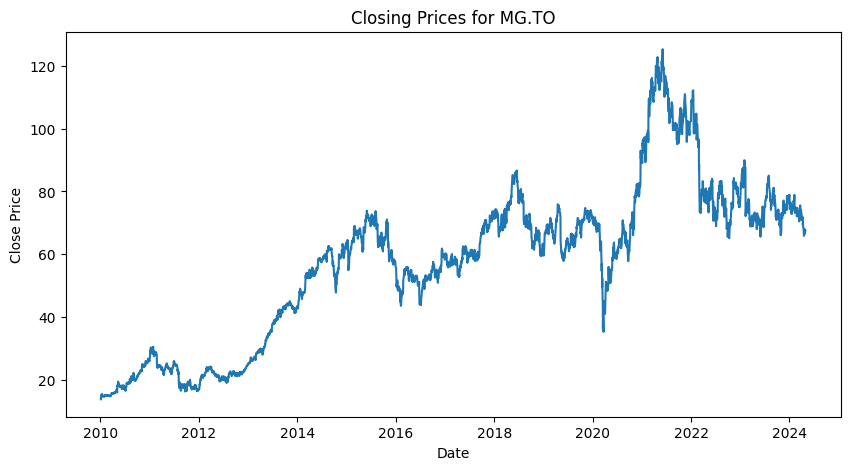

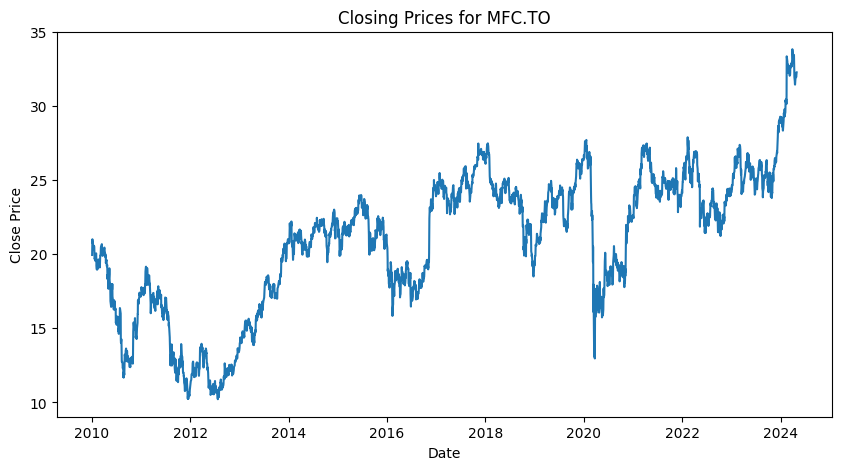

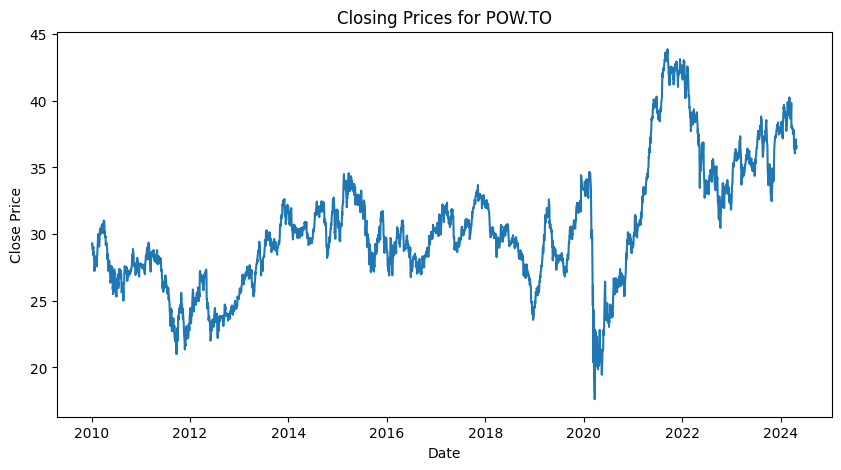

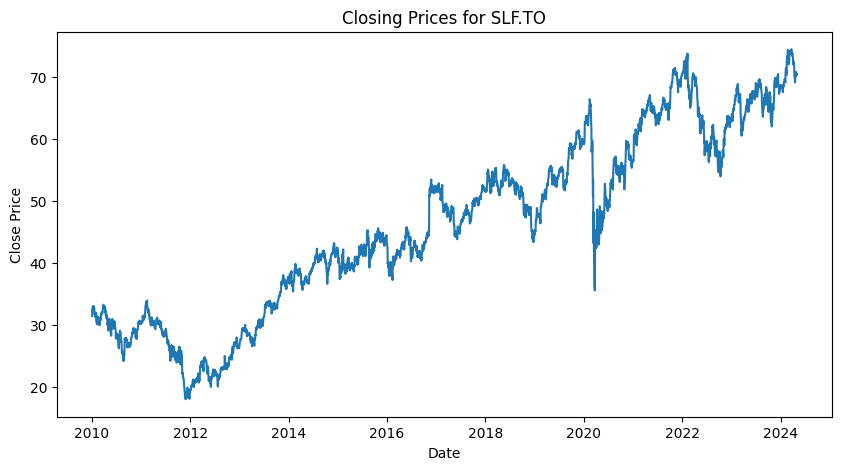

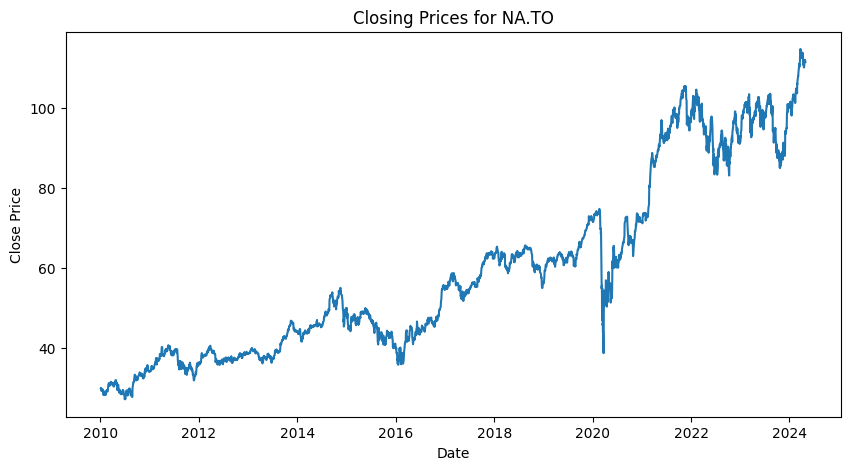

In [70]:
# Line plots for closing prices
for stock in canadian_stock_data:
    plt.figure(figsize=(10, 5))
    plt.plot(canadian_stock_data[stock]['Close'])
    plt.title(f"Closing Prices for {stock}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.show()

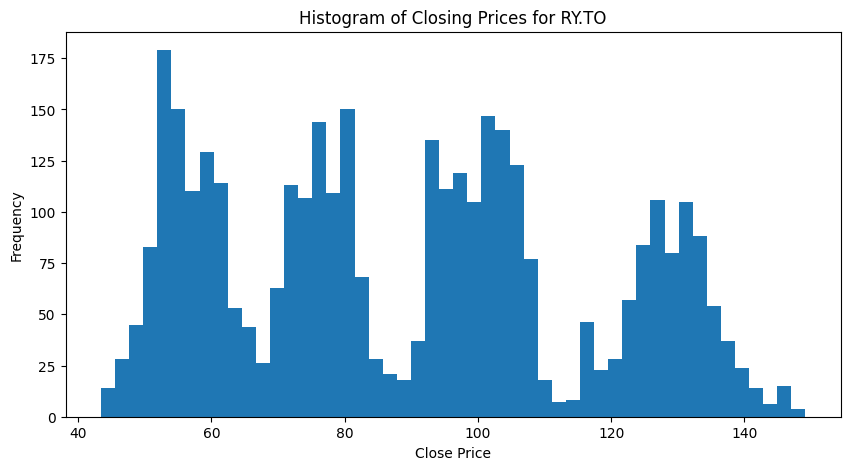

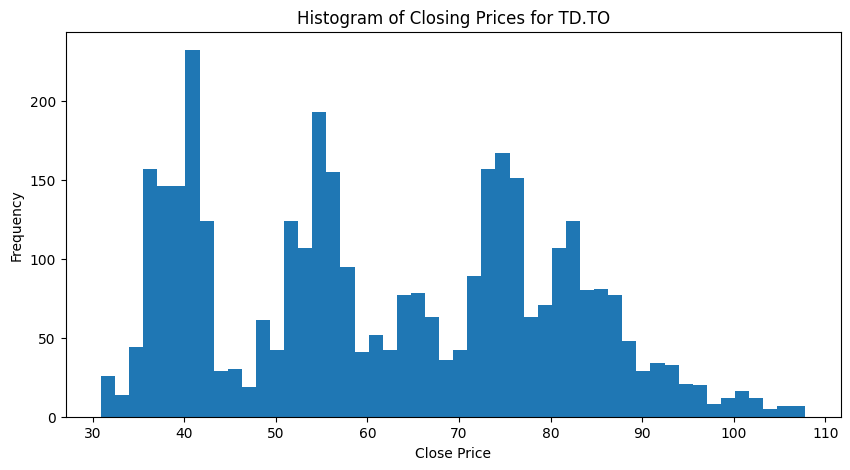

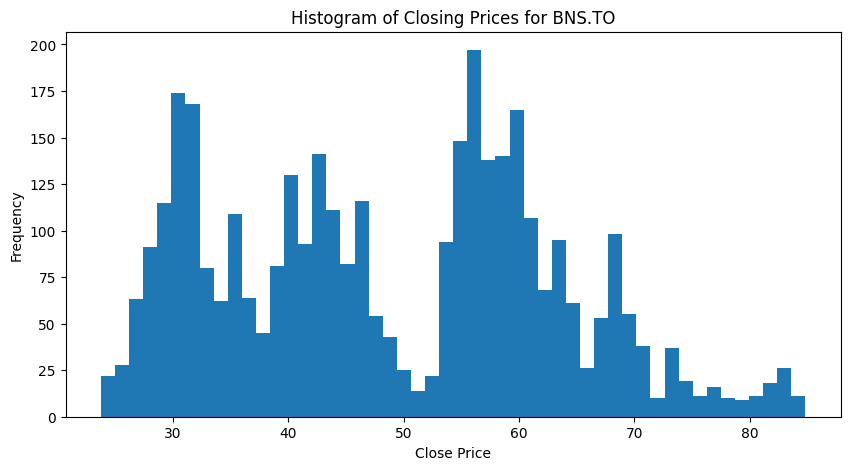

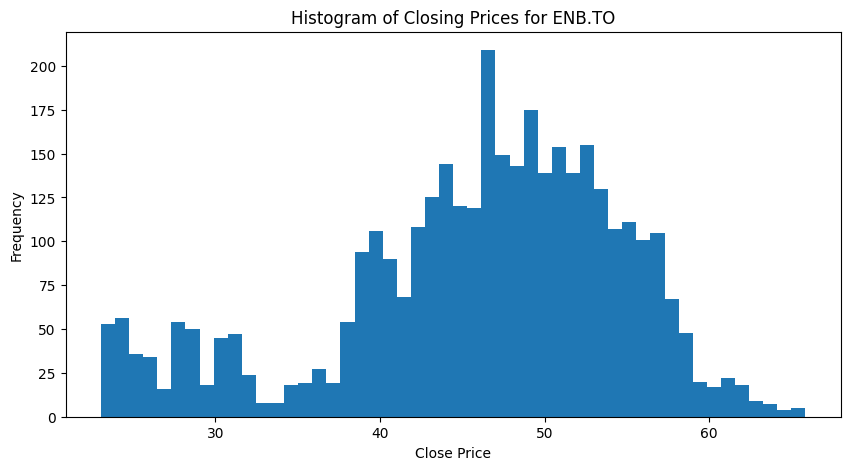

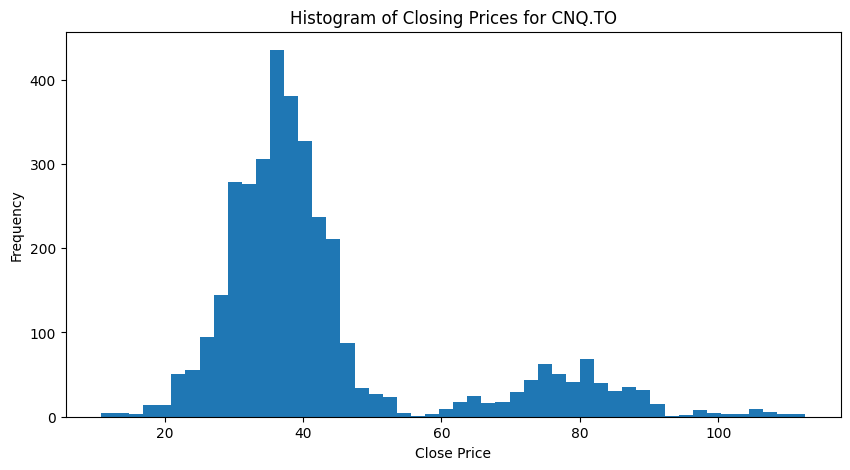

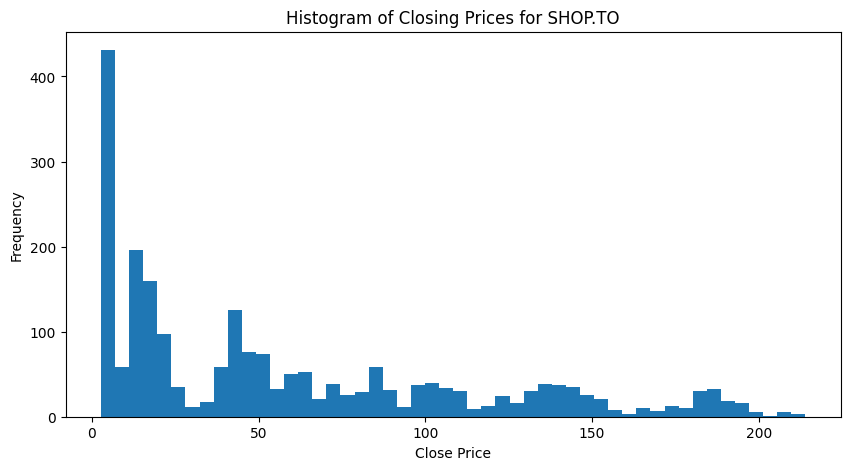

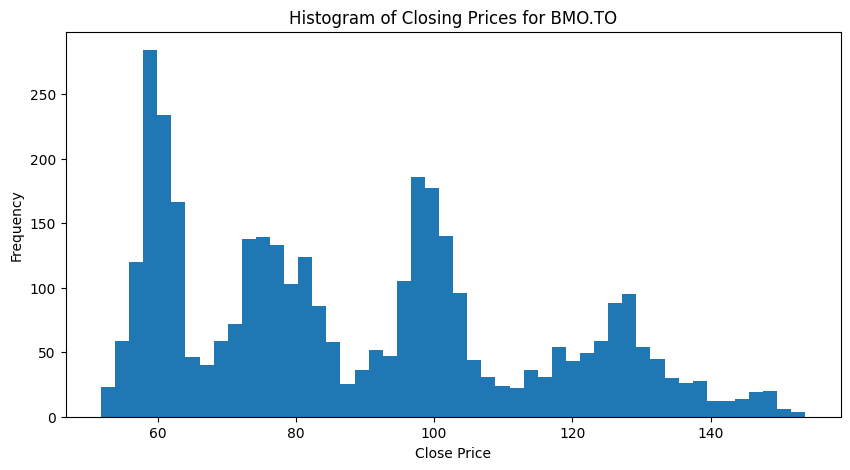

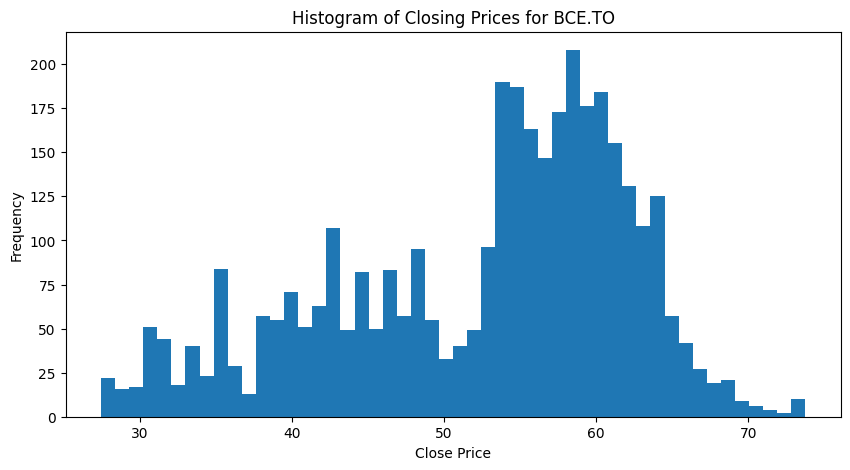

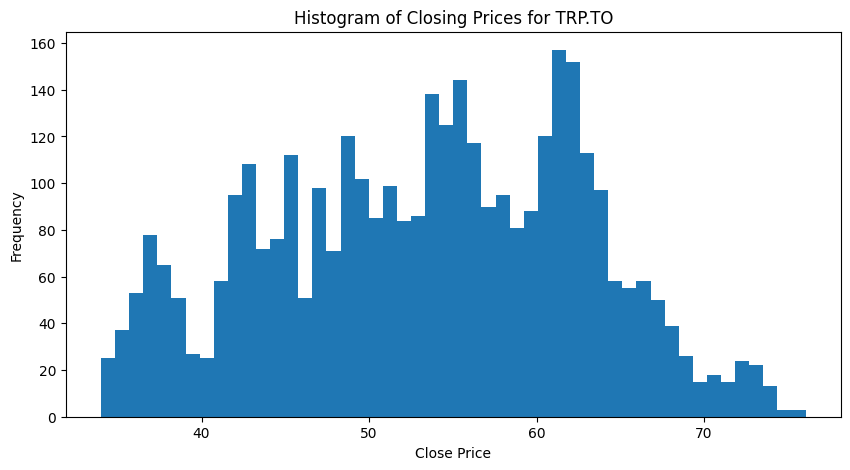

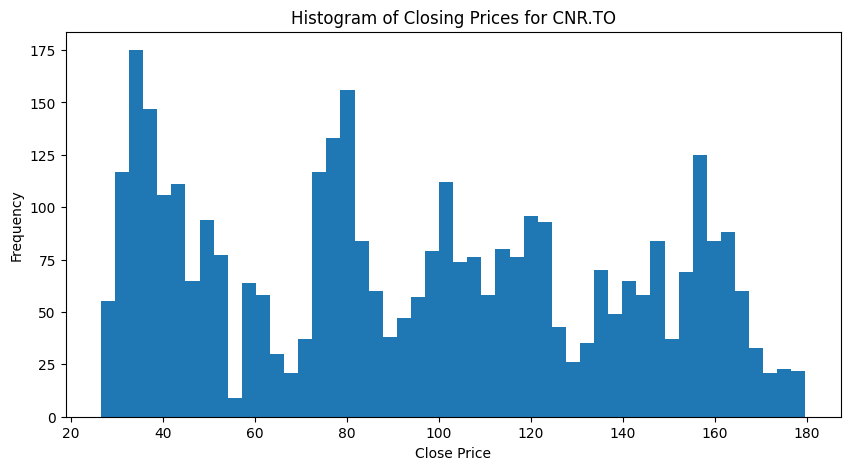

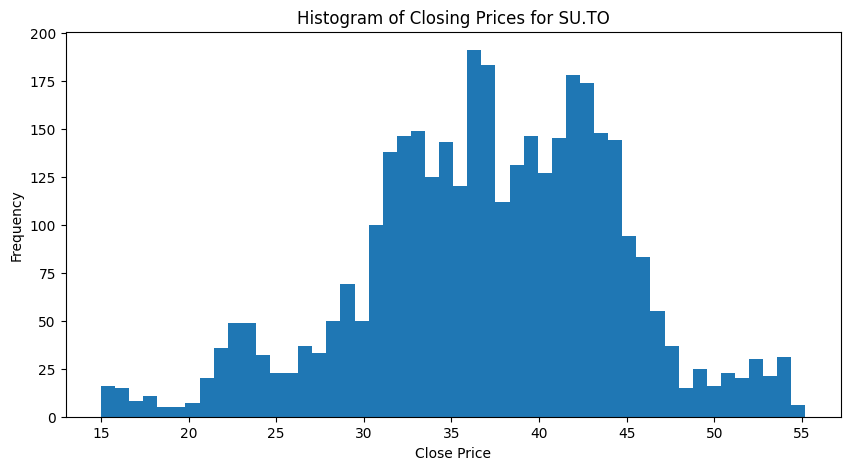

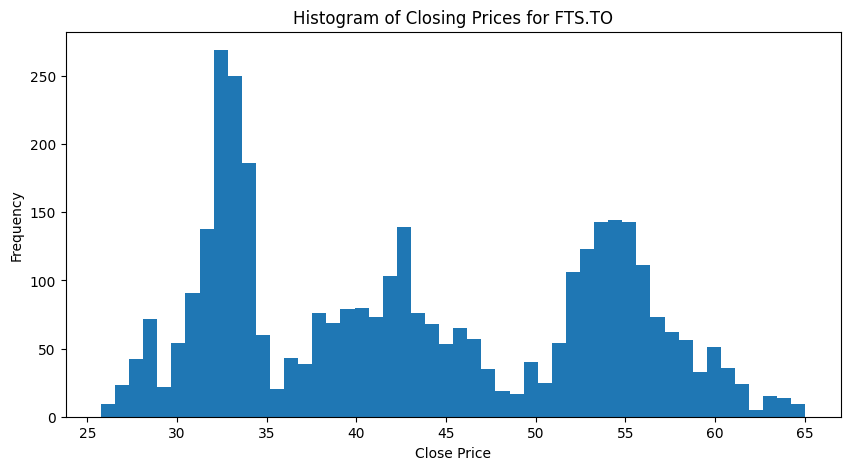

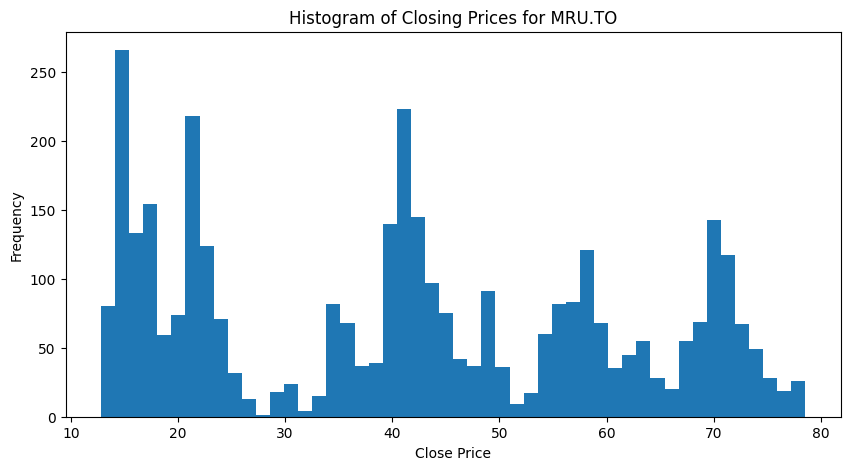

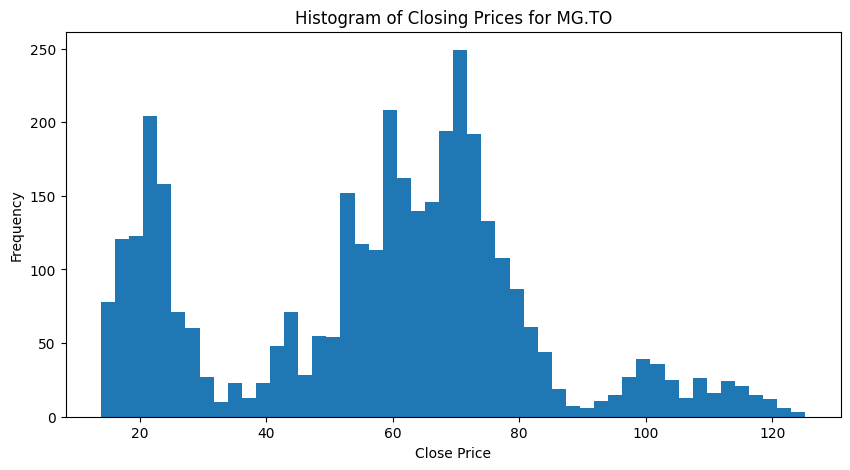

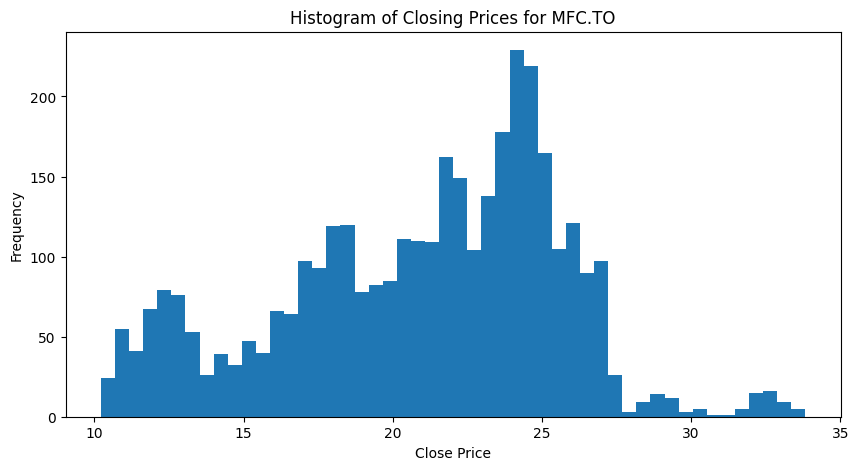

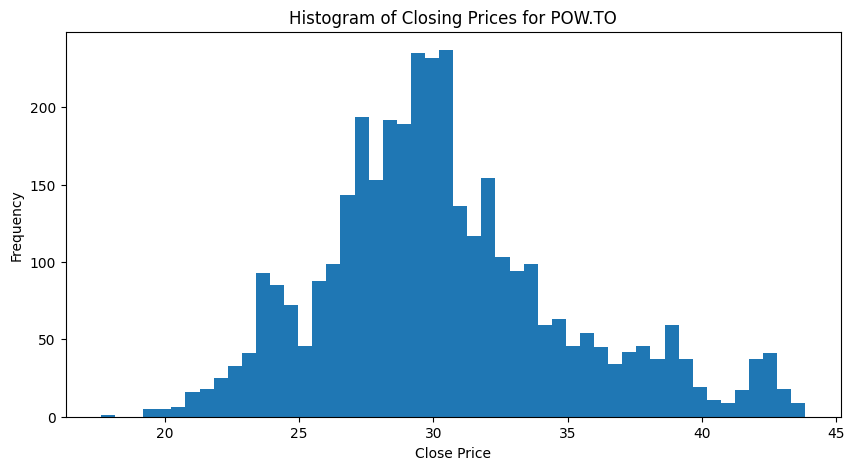

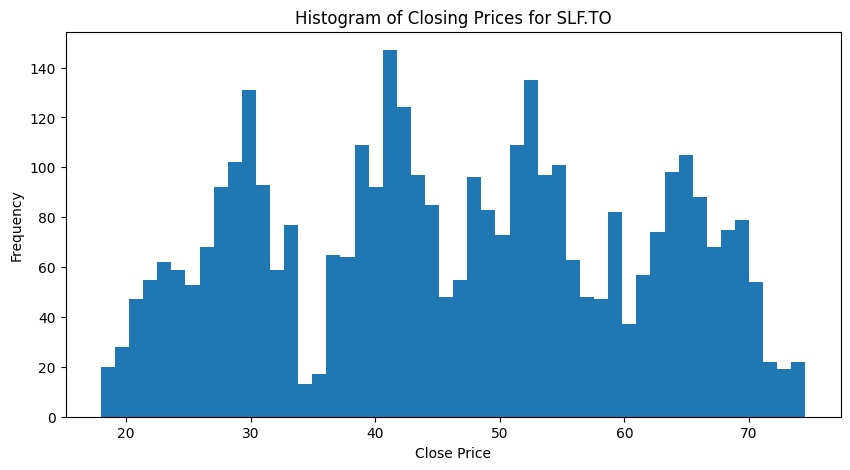

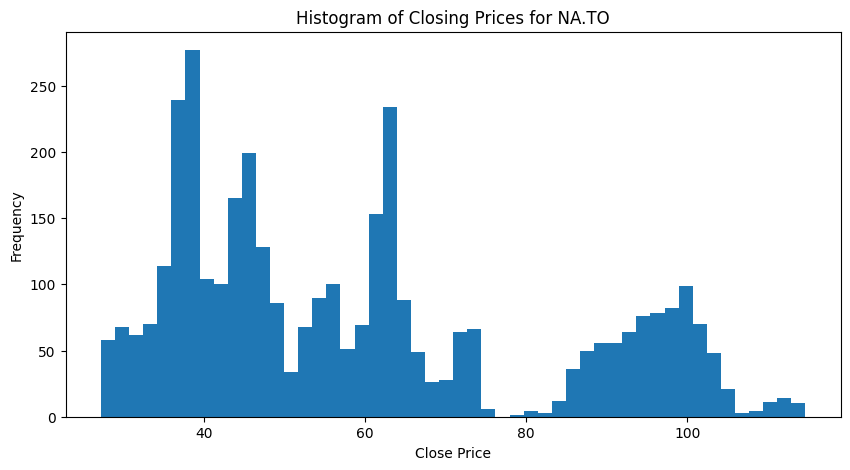

In [71]:
# Histograms for closing prices
for stock in canadian_stock_data:
    plt.figure(figsize=(10, 5))
    plt.hist(canadian_stock_data[stock]['Close'], bins=50)
    plt.title(f"Histogram of Closing Prices for {stock}")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")
    plt.show()

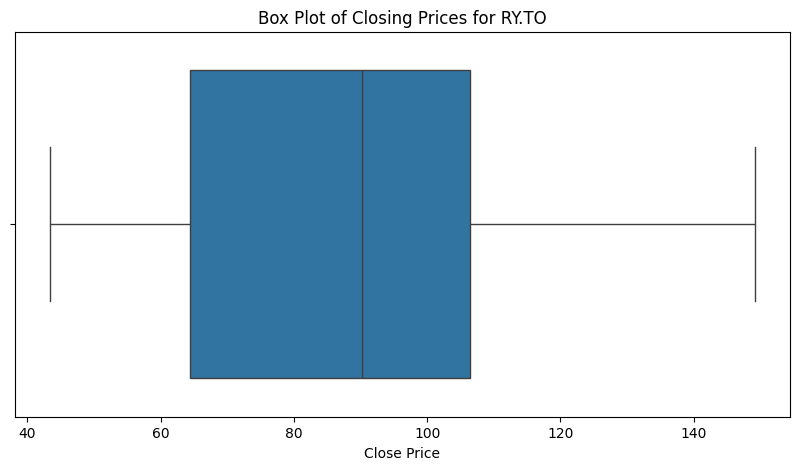

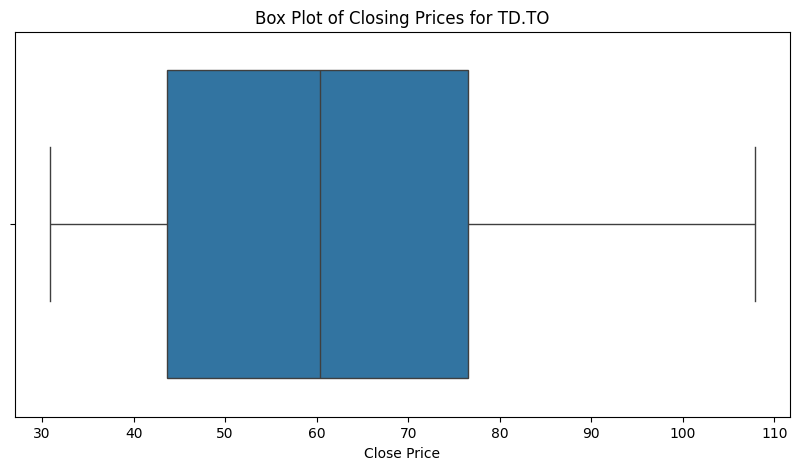

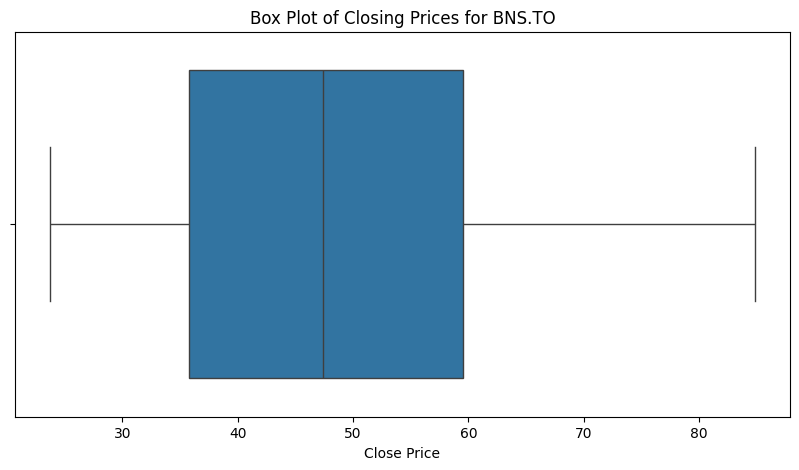

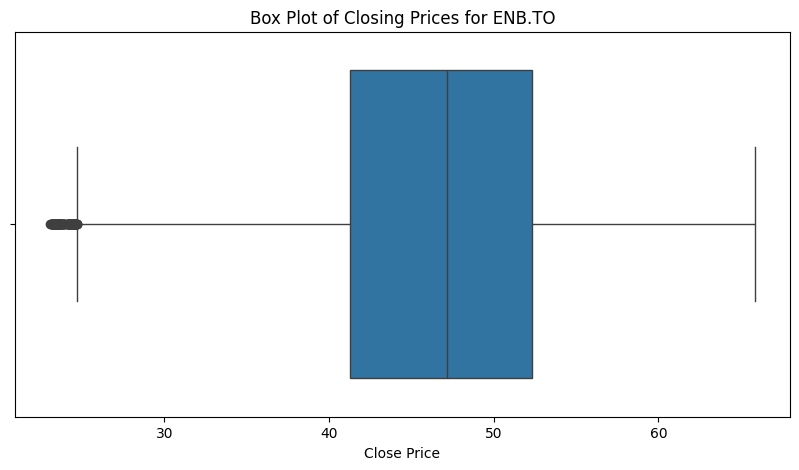

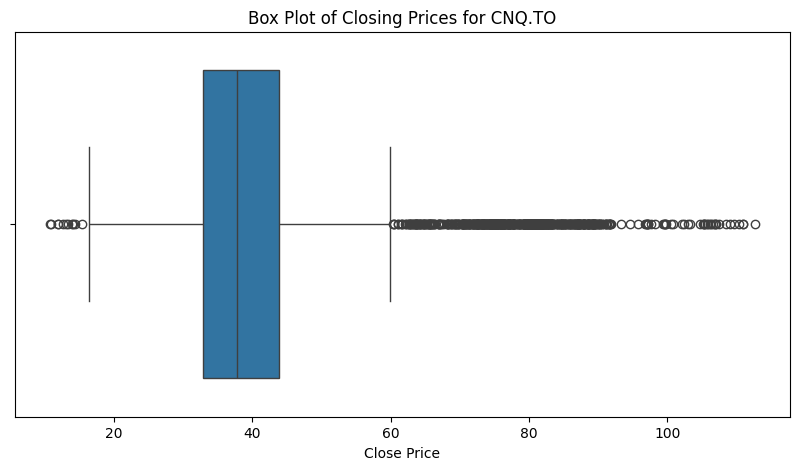

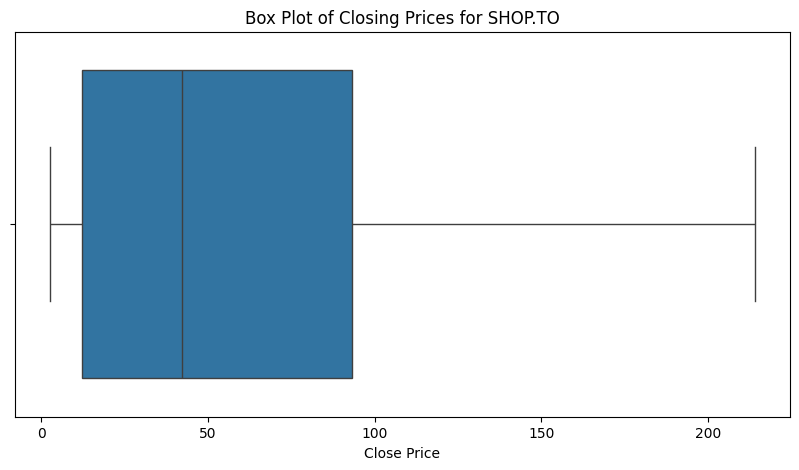

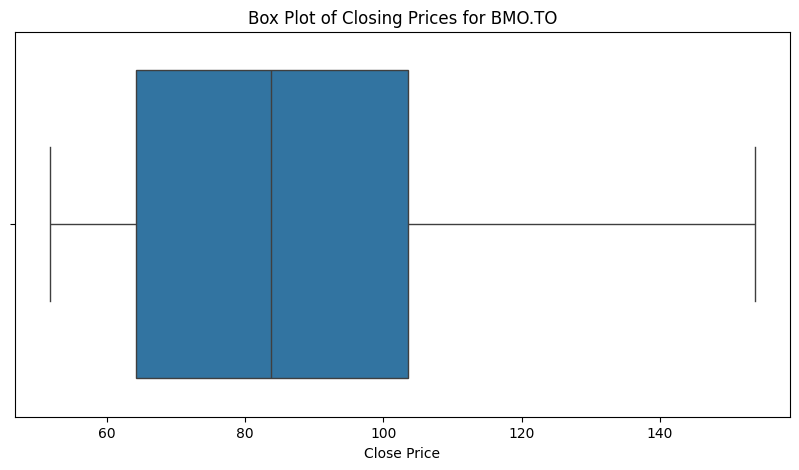

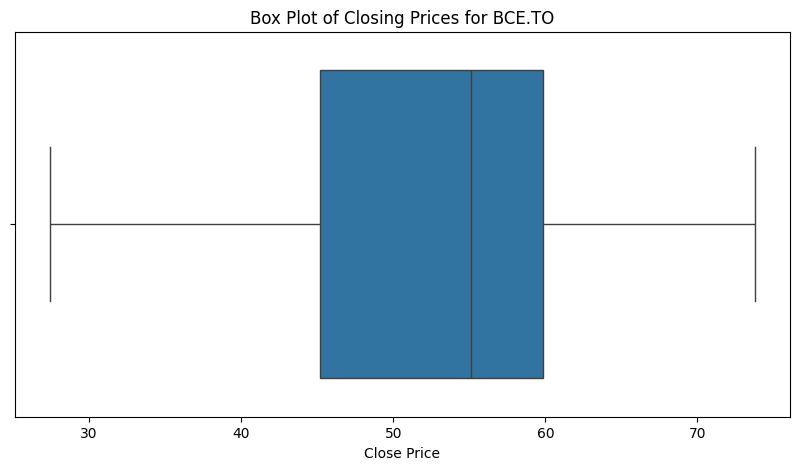

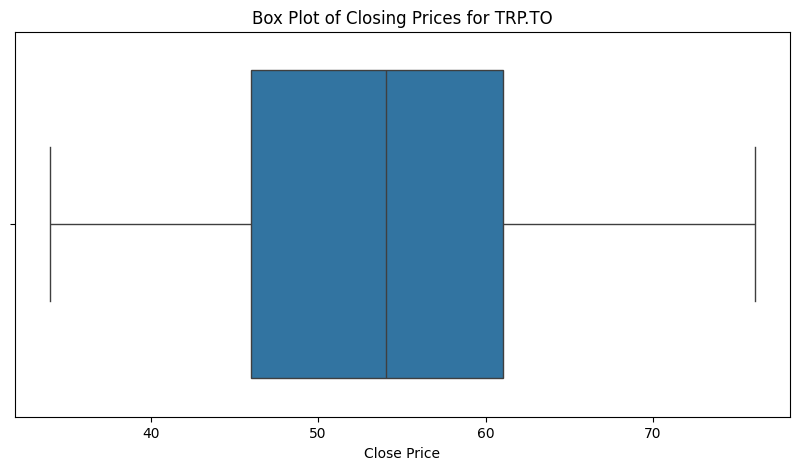

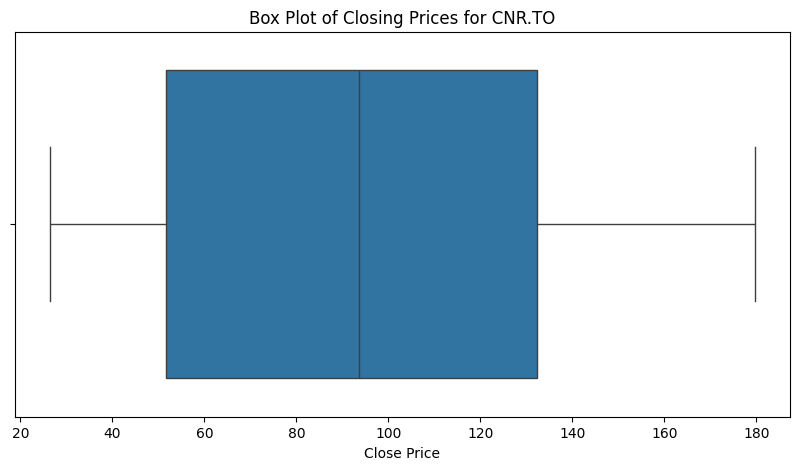

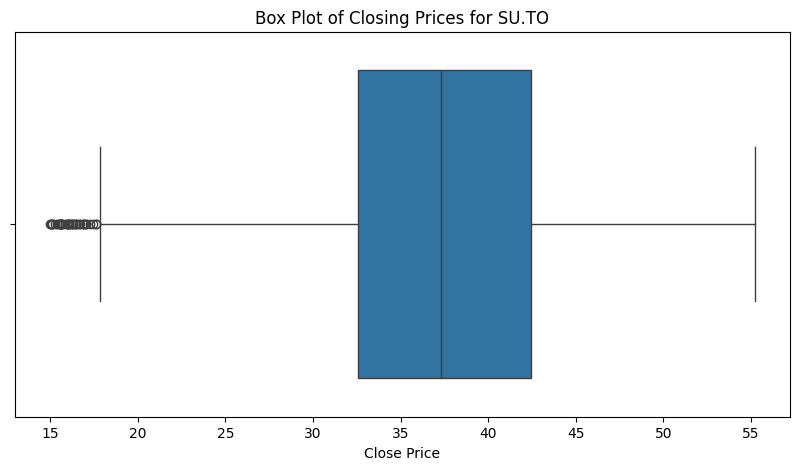

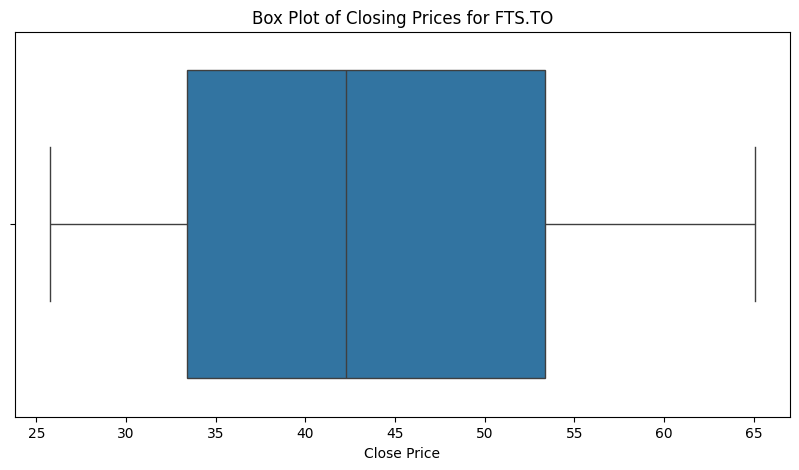

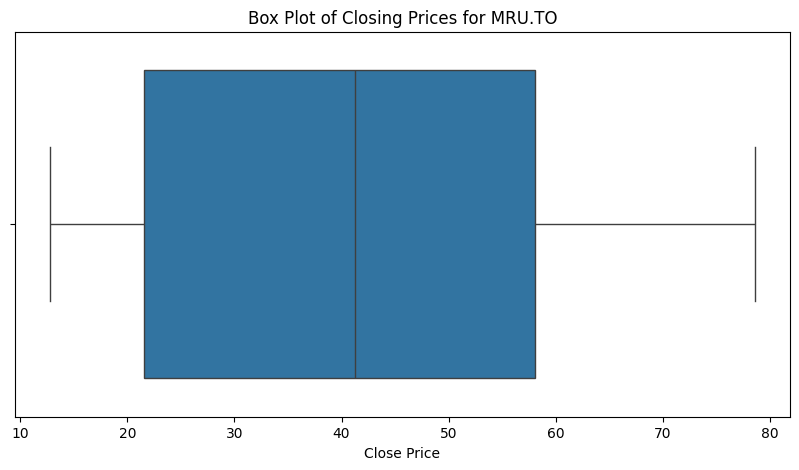

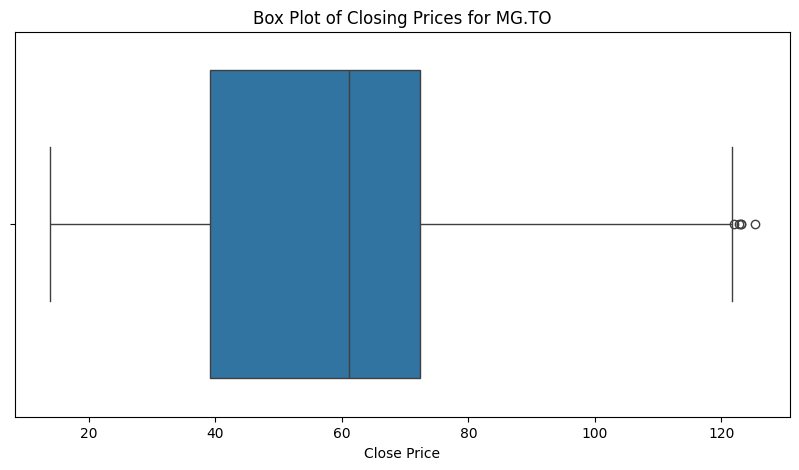

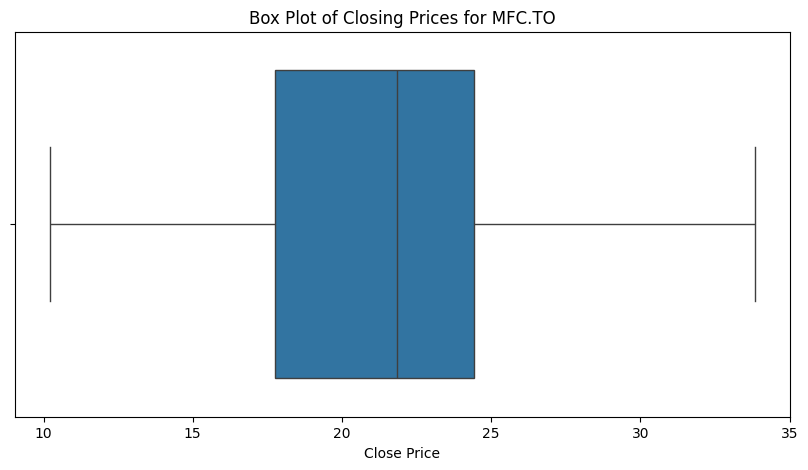

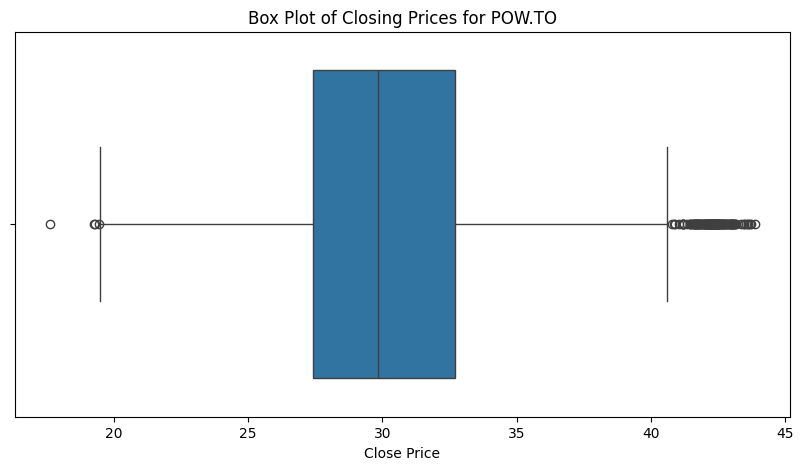

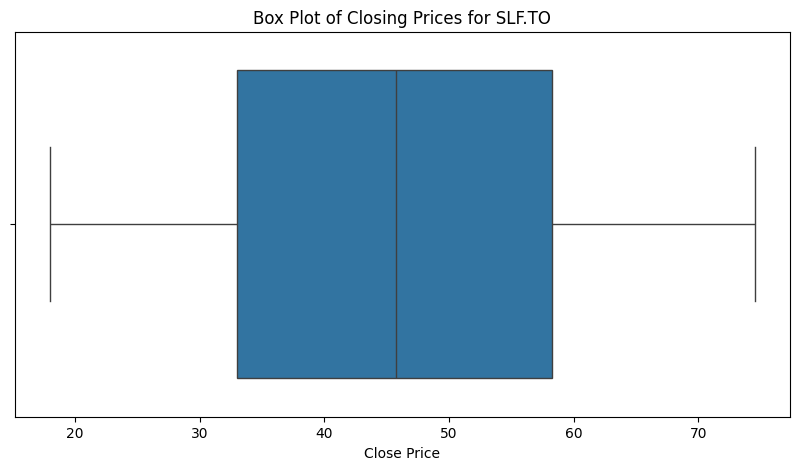

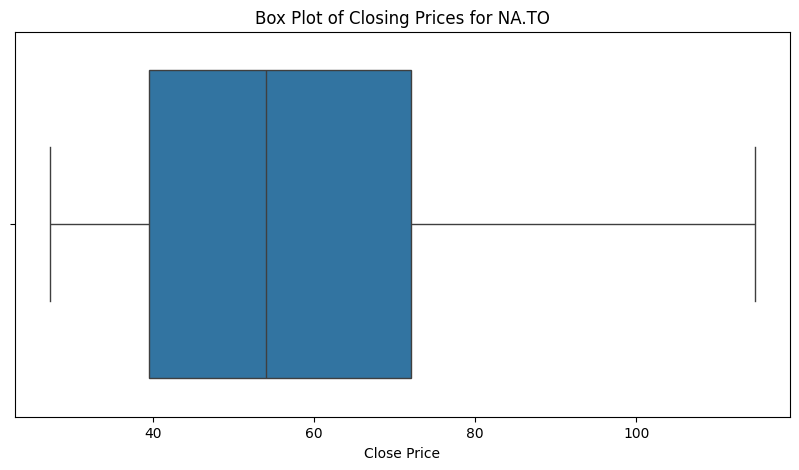

In [72]:
# Box plots to detect outliers
for stock in canadian_stock_data:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=canadian_stock_data[stock]['Close'])
    plt.title(f"Box Plot of Closing Prices for {stock}")
    plt.xlabel("Close Price")
    plt.show()

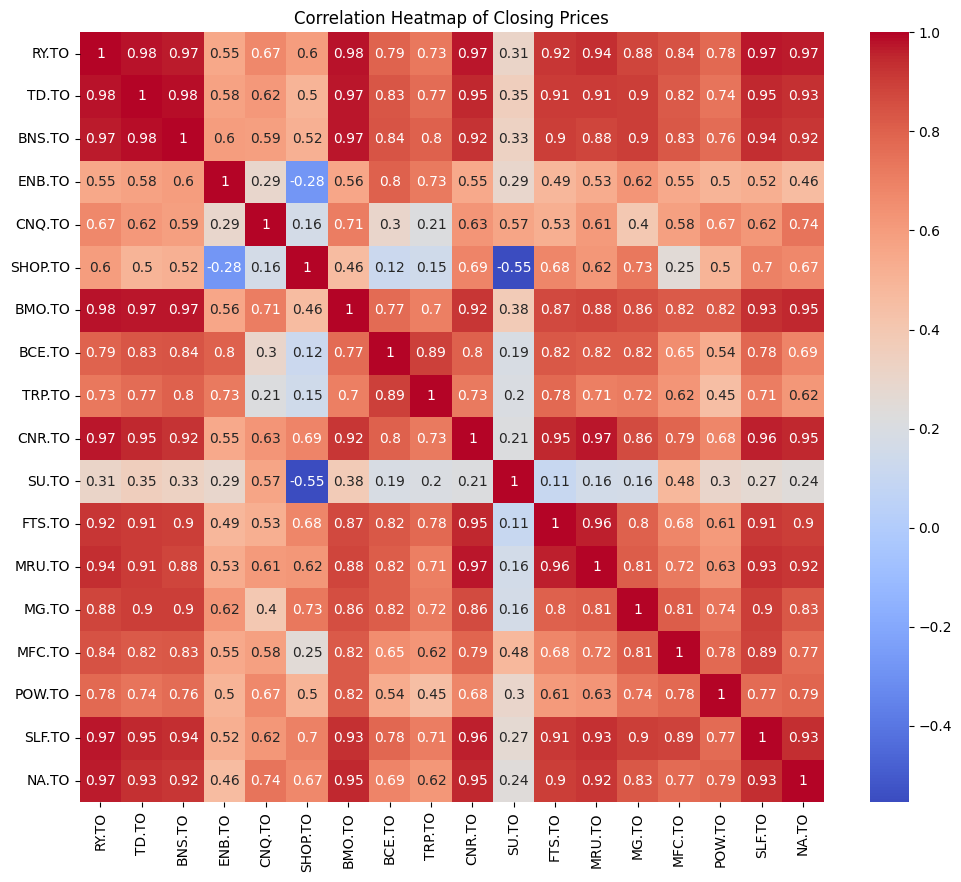

In [73]:
# Correlation heatmap
close_prices = pd.DataFrame({stock: data['Close'] for stock, data in canadian_stock_data.items()})
plt.figure(figsize=(12, 10))
sns.heatmap(close_prices.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Closing Prices")
plt.show()